<a href="https://colab.research.google.com/github/banuelosDaniel/Machine-Learning-KMeansClustering/blob/main/kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#By - Daniel Bañuelos
## Objective: Perform Data Visualization on the data we processed through the k-means Clustering algorithm. 
### Problem Type: Data Visualization - Unsupervised Learning - K-means Clustering

# Loading in the Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
original_df = pd.read_csv('drive/My Drive/Mall_Customers.csv')
processed_df = pd.read_csv('drive/My Drive/processedData.csv')
original_df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
processed_df.head(5)

,x,y,c
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


The 'processedData' dataset is poorly documented. By comparing the columns to the original 'Mall_Customers' dataset we can figure out which columns ['x','y'] refer to. 

Column 'c' refers to the cluster that the datapoint has been assigned to.
It is a new column which is the label we assigned after processing the data through the k-means algorithm.

#Preparing the Data

Let's combine the labels from processed_df to the original_df and work with one dataframe.

In [5]:
labels = processed_df['c']
original_df['cluster'] = labels
df = original_df.copy()

In [6]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [7]:
#Typo in the column 'Genre' change to 'Gender'
df = df.rename(columns={"Genre": "Gender", "cluster":"Cluster"})
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


# Exploratory Data Analysis

In [8]:
df.shape

(200, 6)

In [9]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Cluster                    int64
dtype: object

Convert cluster to categorical type.

In [10]:
convert_to_category = ['Gender','Cluster']
df[convert_to_category] = df[convert_to_category].astype('category')

In [11]:
df.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
Cluster                   category
dtype: object

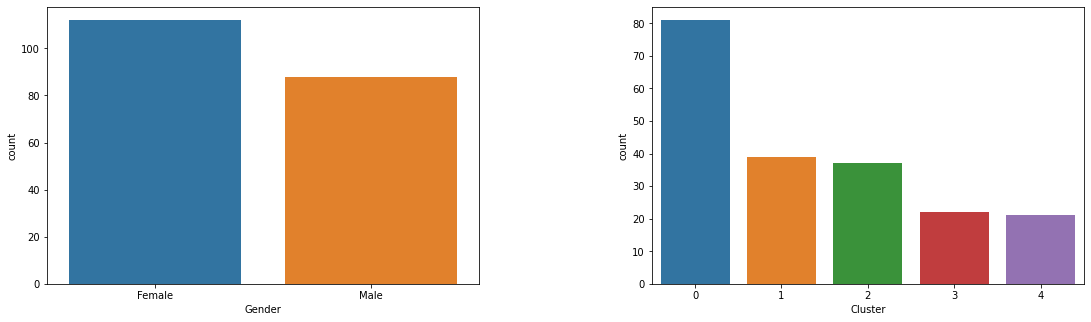

In [12]:
categorical_variables = ['Gender','Cluster']

plt.figure(figsize= (18,25))
for i in enumerate(categorical_variables):
  plt.subplot(4,2,i[0]+1)
  sns.countplot(x=i[1],data=df)
  plt.xticks(rotation = 0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

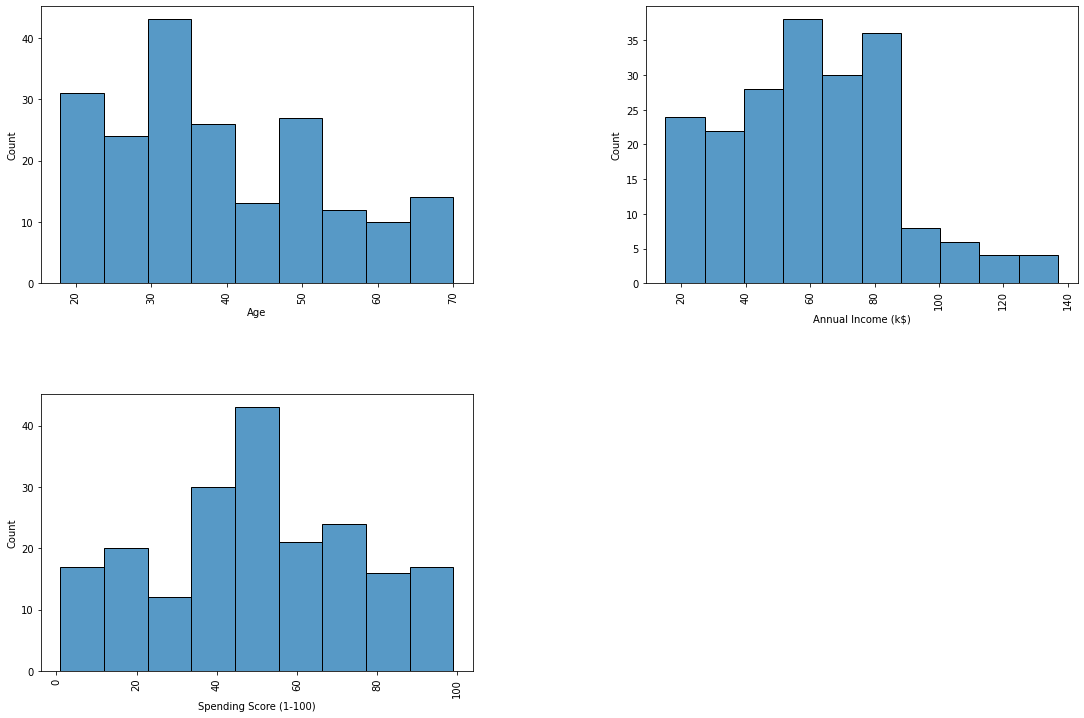

In [13]:
numeric_variables = ['Age','Annual Income (k$)','Spending Score (1-100)']

plt.figure(figsize= (18,25))
for i in enumerate(numeric_variables):
  plt.subplot(4,2,i[0]+1)
  sns.histplot(x=i[1],data=df)
  plt.xticks(rotation = 90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


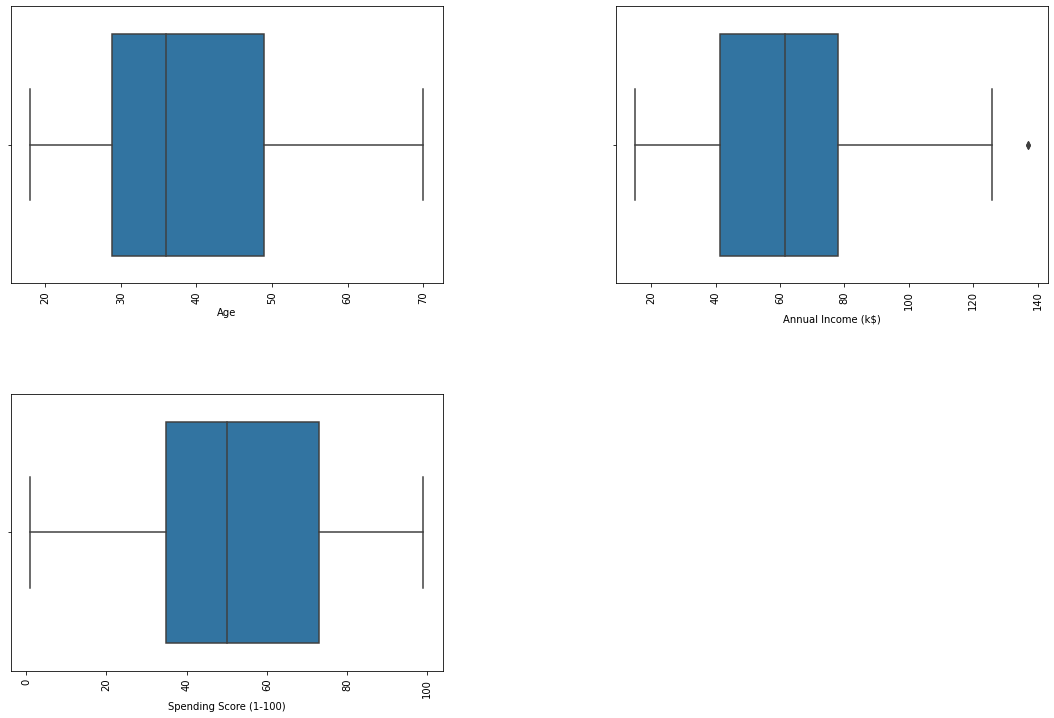

In [16]:
plt.figure(figsize= (18,25))
for i in enumerate(numeric_variables):
  plt.subplot(4,2,i[0]+1)
  sns.boxplot(x=i[1],data=df)
  plt.xticks(rotation = 90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

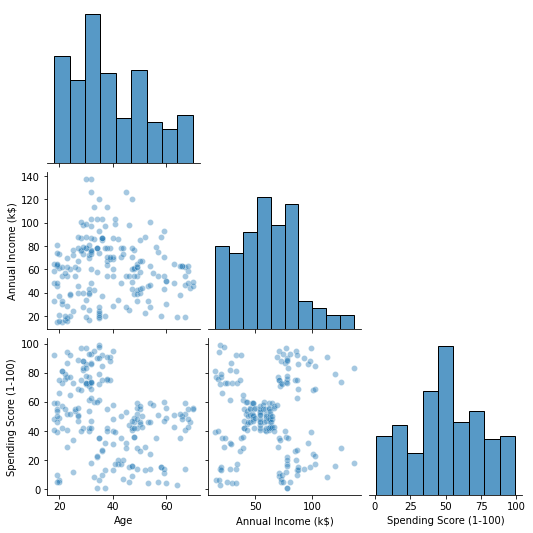

In [17]:
df_numeric_variables = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
sns.pairplot(data = df_numeric_variables,kind="scatter",plot_kws={'alpha': 0.4},corner=True,diag_kind="hist")
plt.show()

We find an interesting plot where there appears to be clusters of data. <br/>
Annual Income (k$) vs Spending Score (1-100) <br/>
Let's take a closer look.

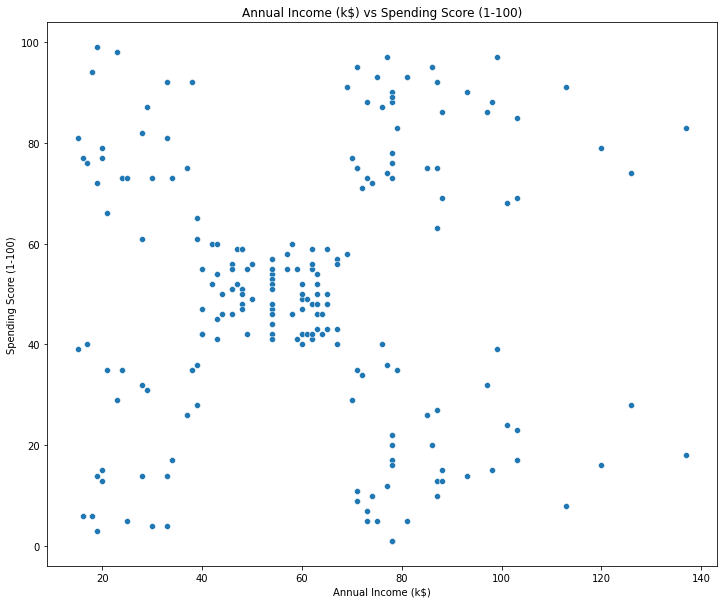

In [18]:
plt.figure(figsize= (12,10))
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)')
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.show()

It is quite apparent that there are groups formed in the data. We can make out 5 distinct clusters.<br/>
Let's add the cluster label to our scatterplot and see if our clustering algorithm has appropriately labeled the data.

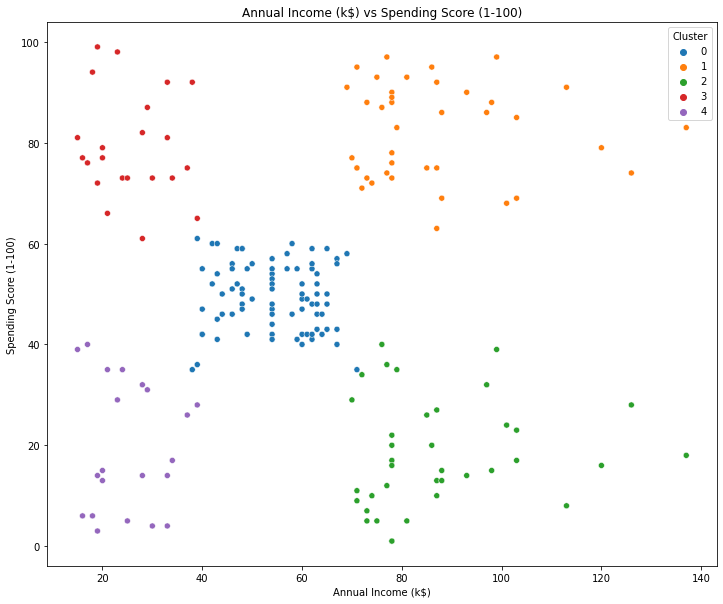

In [19]:
plt.figure(figsize= (12,10))
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster')
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.show()

Our algorithm has proven to successfully group the data into appropriate clusters.